In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 294 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

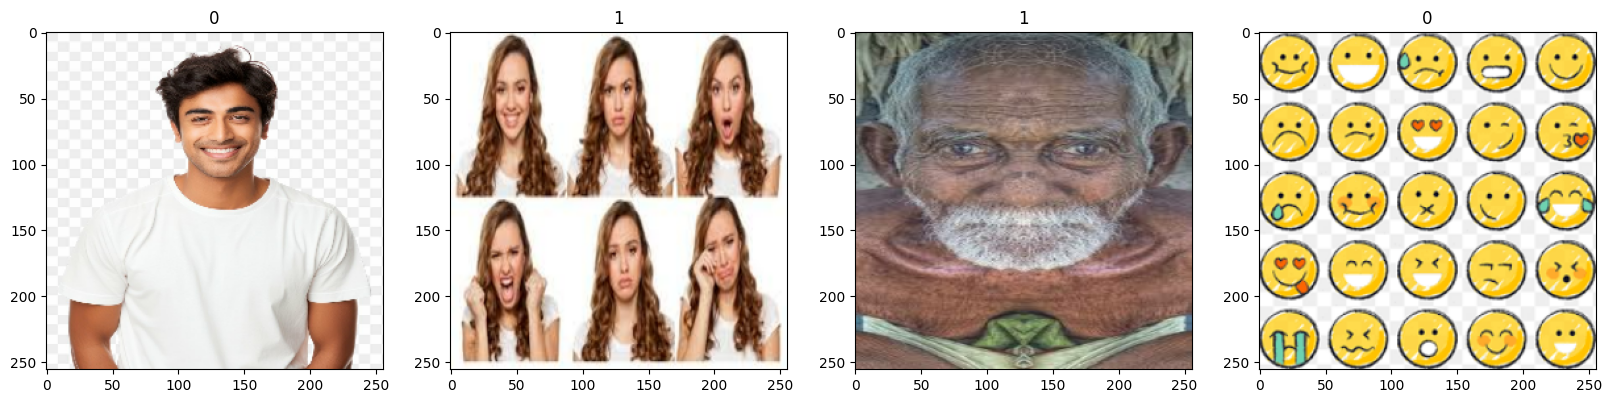

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.85490197, 0.83137256, 0.84705883],
          [0.85490197, 0.83137256, 0.84705883],
          [0.85490197, 0.83137256, 0.84705883],
          ...,
          [0.8627451 , 0.8392157 , 0.84705883],
          [0.8627451 , 0.8392157 , 0.84705883],
          [0.8627451 , 0.8392157 , 0.84705883]],
 
         [[0.85490197, 0.83137256, 0.84705883],
          [0.85490197, 0.83137256, 0.84705883],
          [0.85550874, 0.83197933, 0.8476656 ],
          ...,
          [0.8642387 , 0.84070927, 0.8485524 ],
          [0.8642387 , 0.84070927, 0.8485524 ],
          [0.8642387 , 0.84070927, 0.8485524 ]],
 
         [[0.85490197, 0.83137256, 0.84705883],
          [0.8570023 , 0.83347285, 0.8491591 ],
          [0.8579731 , 0.8344437 , 0.85012996],
          ...,
          [0.8666667 , 0.84313726, 0.8509804 ],
          [0.8666667 , 0.84313726, 0.8509804 ],
          [0.8666667 , 0.84313726, 0.8509804 ]],
 
         ...,
 
         [[0.9098039 , 0.9019608 , 0.9137255 ],
          [0.90980

In [14]:
len(data)

10

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [20]:
model = Sequential()

In [21]:
model.add(Input(shape=(256, 256, 3)))  # Add the input layer
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
# model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,769,697 (56.34 MB)

 Trainable params: 14,769,697 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.4663 - loss: 2.2111 - val_accuracy: 0.5469 - val_loss: 0.6724
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.6124 - loss: 0.6536 - val_accuracy: 0.6562 - val_loss: 0.6404
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.6983 - loss: 0.6189 - val_accuracy: 0.6719 - val_loss: 0.5676
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.7161 - loss: 0.5599 - val_accuracy: 0.8438 - val_loss: 0.4585
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.7299 - loss: 0.5030 - val_accuracy: 0.8438 - val_loss: 0.4313
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.8274 - loss: 0.4413 - val_accuracy: 0.8438 - val_loss: 0.4161
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.8656 - loss: 0.3627 - val_accuracy: 0.9375 - val_loss: 0.2619
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.9329 - loss: 0.2519 - val_accuracy: 0.9062 - val_loss:

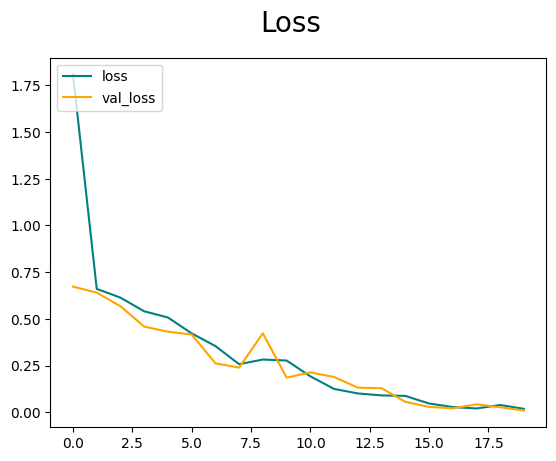

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

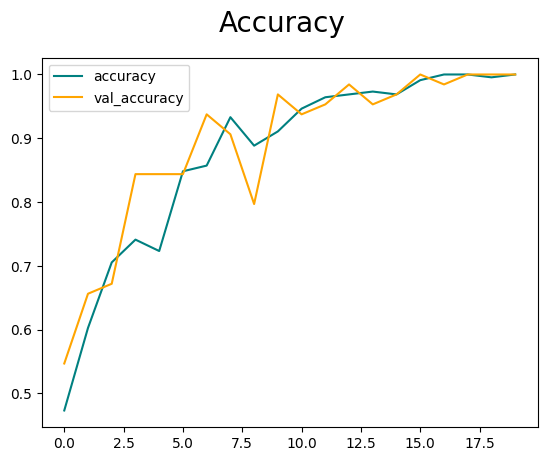

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [33]:
import cv2
import matplotlib.pyplot as plt

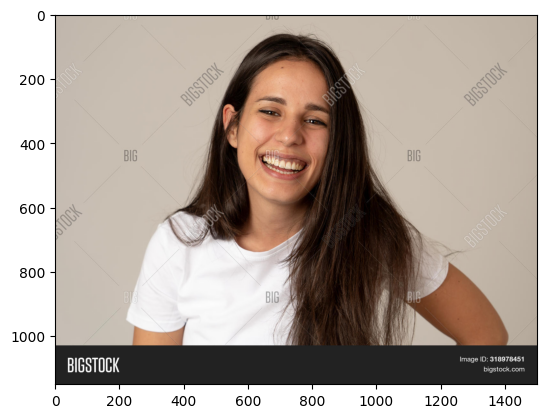

In [34]:
# Read the image using OpenCV
img = cv2.imread('C:\\Users\\hardi\\Desktop\\Shell_Internship\\data\\happy\\318978451.jpg')
# Convert the image from BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.show()

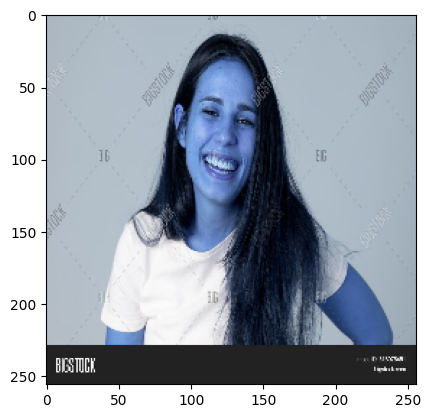

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [37]:
yhat

array([[0.00839753]], dtype=float32)

In [38]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','imageclassifier.h5'))

In [41]:
model.save(os.path.join('models', 'imageclassifier.keras'))
